In [1]:
%matplotlib inline
from IPython.display import Image, HTML

In [2]:
import os
os.getcwd()

'C:\\Users\\gangadhar\\Desktop\\project'

In [3]:
os.chdir("C:\\Users\\gangadhar\\Desktop\\project\\")

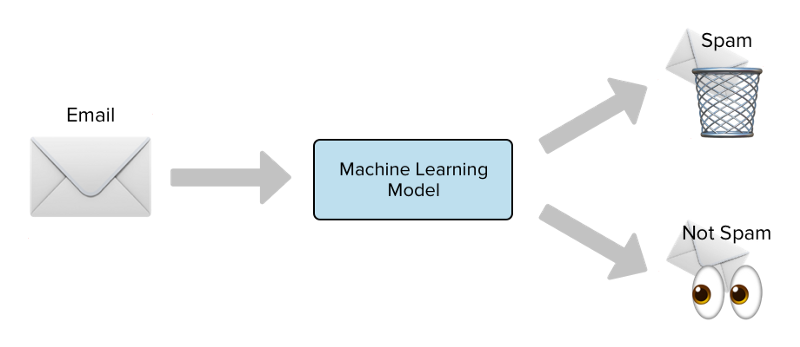

In [4]:
Image(filename="spam.png",width=1000,height=500)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
data=pd.read_csv('emails(1).csv')
data.head(15)

,text,spam
0,Subject: you don _ t know how to attract custo...,1
1,Subject: still wanna her ? : - ) you have not...,1
2,Subject: checking account update dear reader ...,1
3,"Subject: no pills , no pumps - its the patch ...",1
4,Subject: look ! desparately seeking 100 lazy p...,1
5,Subject: you ' ve won ! confirmation number 56...,1
6,Subject: returned mail : see transcript for de...,1
7,Subject: elektronik lottery promotion prize aw...,1
8,Subject: first - class quality . economic pric...,1
9,"Subject: localized software , all languages av...",1


In [7]:
data.shape

(998, 2)

In [8]:
data.text=data.text.transform(lambda x:x.replace("Subject:",''))

In [9]:
data.head()

,text,spam
0,you don _ t know how to attract customers to ...,1
1,still wanna her ? : - ) you have not tried c...,1
2,checking account update dear reader : we so...,1
3,"no pills , no pumps - its the patch experien...",1
4,look ! desparately seeking 100 lazy people . ...,1


In [10]:
import nltk
from nltk.corpus import stopwords
import re
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer

In [11]:
#nltk.download('stopwords')
#nltk.download('wordnet')

# PRE-PROCESSING MODULE

In [12]:
tk=TweetTokenizer()
ps = PorterStemmer()
lem=WordNetLemmatizer()
def cleaning(s):
    s = str(s)
    s = s.lower()
    s = re.sub('\s\W',' ',s)
    s = re.sub('\W,\s',' ',s)
    s = re.sub(r'[^\w]', ' ', s)
    s = re.sub("\d+", "", s)
    s = re.sub('\s+',' ',s)
    s = re.sub('[!@#$_]', '', s)
    s = s.replace("co","")
    s = s.replace("https","")
    s = s.replace(",","")
    s = s.replace("[\w*"," ")
    s=s.lower()
    s=tk.tokenize(s)
    s=[ps.stem(word) for word in s if not word in set(stopwords.words('english'))]
    s=[lem.lemmatize(word) for word in s]
    s= ' '.join(s)
    return s

In [13]:
data['content'] = [cleaning(s) for s in data['text']]

In [14]:
data['content'][1]

'still wanna tri ciall yet cannot even imagin like real man bed thing great errrectlon provid exactli want ciaii iot advantaq viaqra effect last hour readi start within minut mix alhol ship untri avail get right'

In [15]:
all_words = ' '.join([text for text in data['content']])

# EXPLORATORY DATA ANALYSIS

In [16]:
#pip install wordcloud

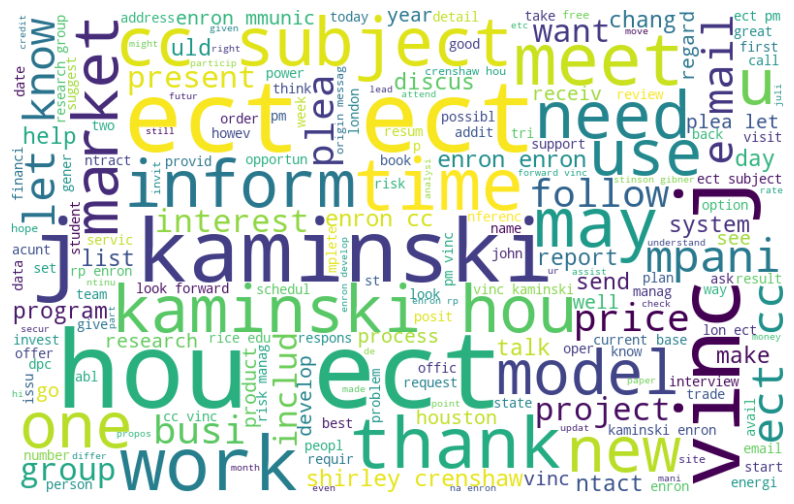

In [17]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,background_color="white").generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


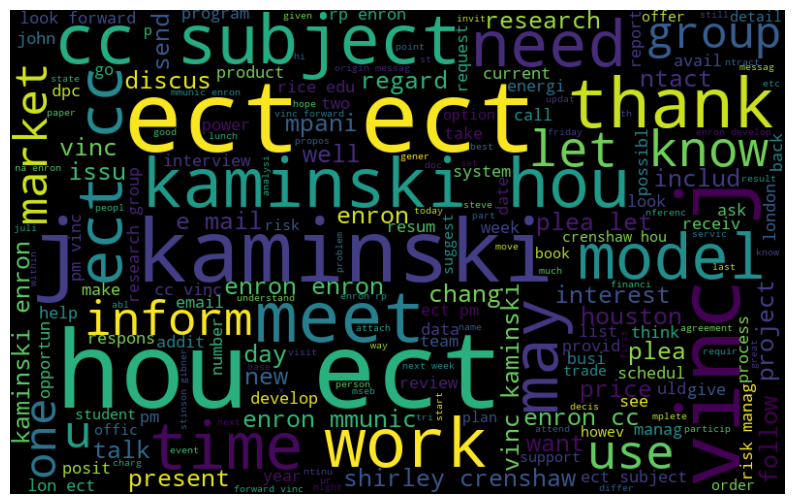

In [18]:
normal_words =' '.join([text for text in data['content'][data['spam'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

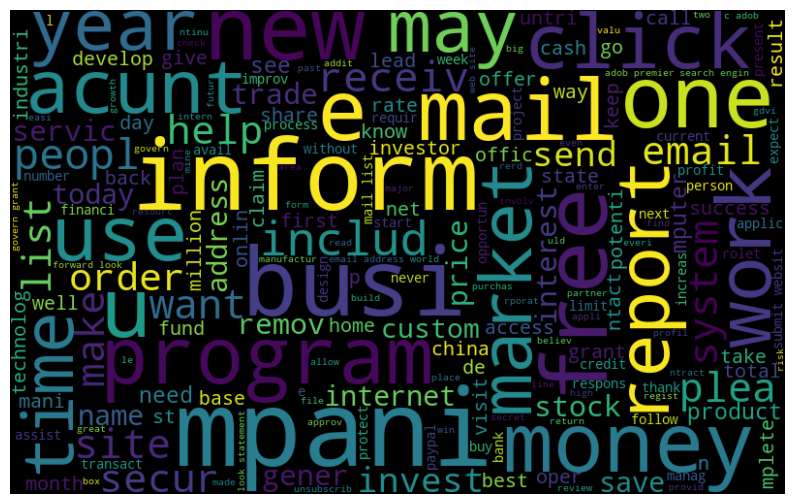

In [19]:
negative_words = ' '.join([text for text in data['content'][data['spam'] == 1]])
wordcloud = WordCloud(width=800, height=500,random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


In [22]:
def hashtag_extract(x):
    hashtags = []
    for i in x:
        ht =re.findall(r'\w+', i)
        hashtags.append(ht)
    return hashtags

In [23]:
HT_regular = hashtag_extract(data['content'][data['spam'] == 0])

HT_negative = hashtag_extract(data['content'][data['spam'] == 1])

In [24]:
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

In [25]:
import seaborn as sns

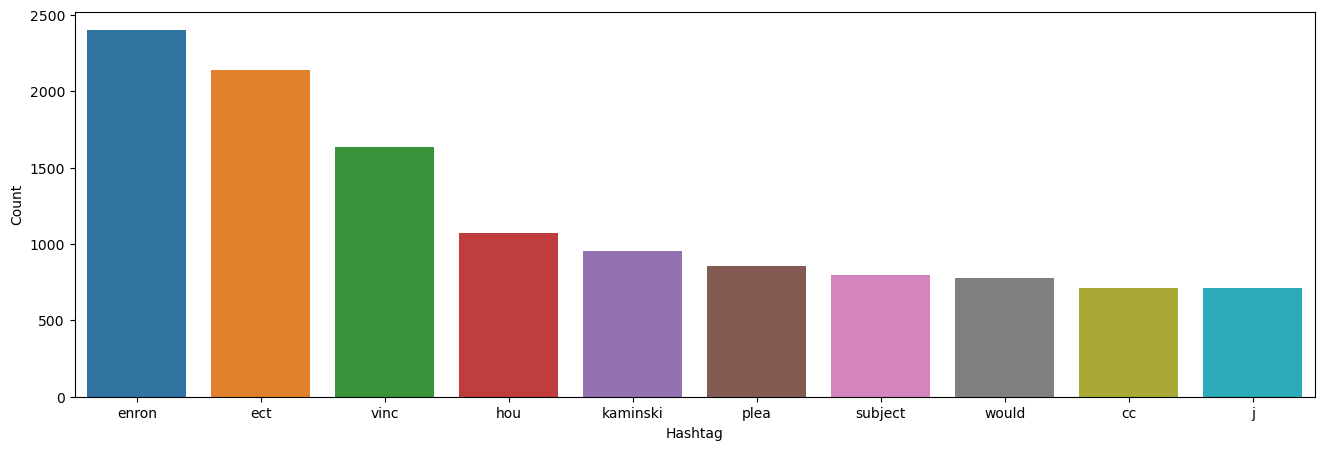

In [26]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

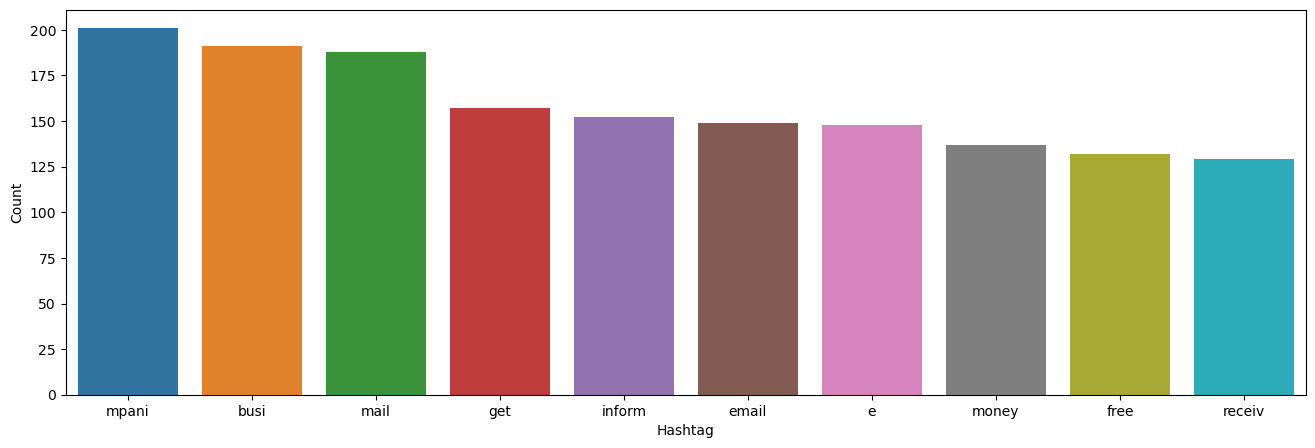

In [27]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()



In [28]:
from sklearn.feature_extraction.text import  CountVectorizer

In [29]:
vectorizer = CountVectorizer(ngram_range=(1,1,),stop_words=stopwords.words('english')).fit(data['content'])

In [30]:
X=vectorizer.transform(data['content']).toarray()

In [31]:
from sklearn.feature_extraction.text import TfidfTransformer

In [32]:
tran=TfidfTransformer().fit(X)

X=tran.transform(X).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [33]:
from sklearn.model_selection import train_test_split


train_x,test_x,train_y,test_y=train_test_split(X,data.spam.values,test_size=0.25,random_state=0)

# LOGISTIC REGRESSION

In [34]:
import warnings
warnings.filterwarnings("ignore") 

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [36]:
model_log=LogisticRegression()

In [37]:
model_log.fit(train_x,train_y)

LogisticRegression()

In [38]:
test_y#actual values

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0], dtype=int64)

In [39]:
model_log.score(test_x,test_y)

0.92

In [40]:
y_pred = model_log.predict(test_x)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [41]:
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error

In [42]:
cm_df = pd.DataFrame(confusion_matrix(test_y, y_pred).T, index=model_log.classes_,columns=model_log.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)

True         0   1
Predicted         
0          207  20
1            0  23


In [43]:
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       207
           1       1.00      0.53      0.70        43

    accuracy                           0.92       250
   macro avg       0.96      0.77      0.83       250
weighted avg       0.93      0.92      0.91       250



In [46]:
accuracy=accuracy_score(test_y, y_pred)
print('accuracy:',accuracy)

accuracy: 0.92


ROC AUC: 0.77


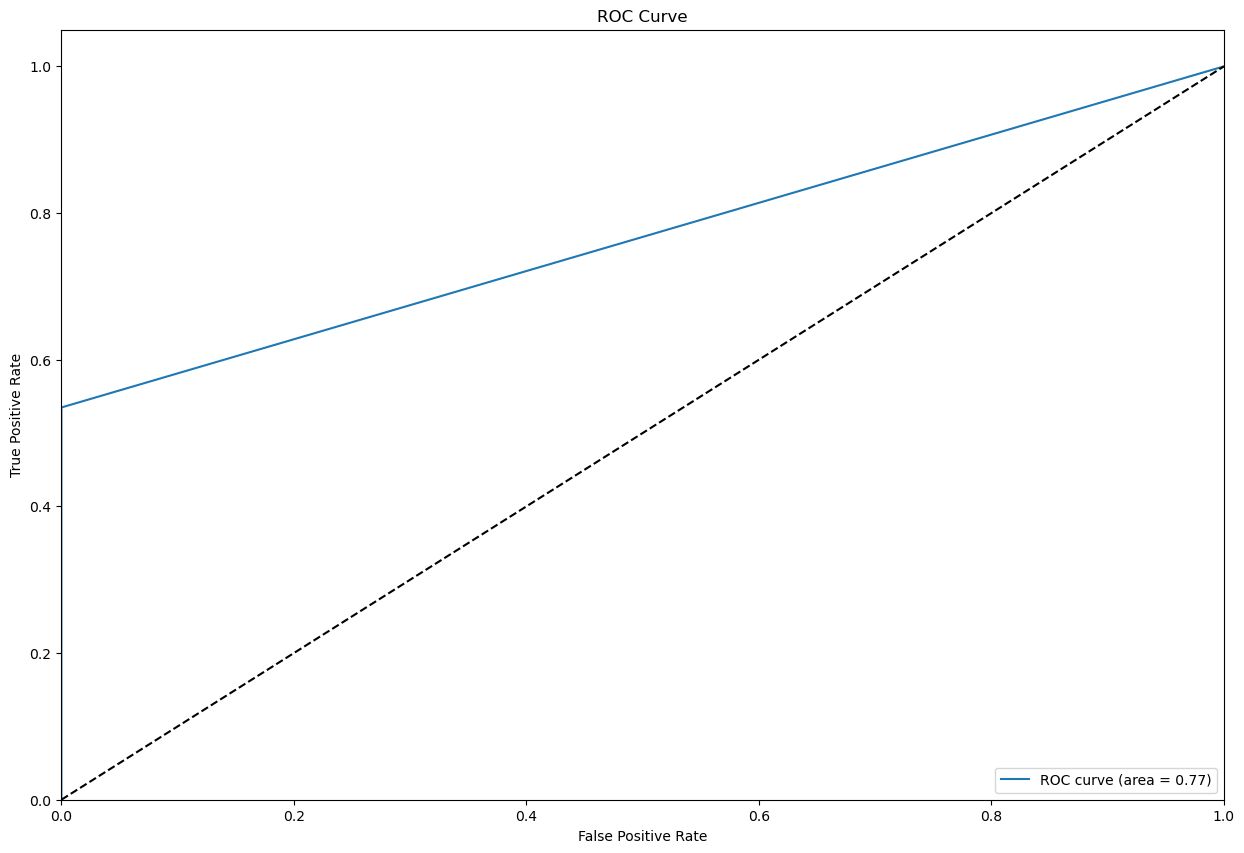

In [49]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, cohen_kappa_score
fpr, tpr, _ = roc_curve(test_y, y_pred)
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print('ROC AUC: %0.2f' % roc_auc)
# Plot of a ROC curve for a specific class
plt.figure(figsize=(15,10))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# NAIVE BAYES CLASSIFIER

In [50]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(train_x,train_y)

GaussianNB()

In [51]:
model.score(train_x,train_y)

0.9986631016042781

In [52]:
model.score(test_x,test_y)

0.944

In [53]:
y_predict = model.predict(test_x)
y_predict

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0], dtype=int64)

In [54]:
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error

In [55]:
cm_df = pd.DataFrame(confusion_matrix(test_y, y_predict).T, index=model.classes_,columns=model.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)

True         0   1
Predicted         
0          204  11
1            3  32


In [56]:
print(classification_report(test_y, y_predict))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       207
           1       0.91      0.74      0.82        43

    accuracy                           0.94       250
   macro avg       0.93      0.86      0.89       250
weighted avg       0.94      0.94      0.94       250



ROC AUC: 0.86


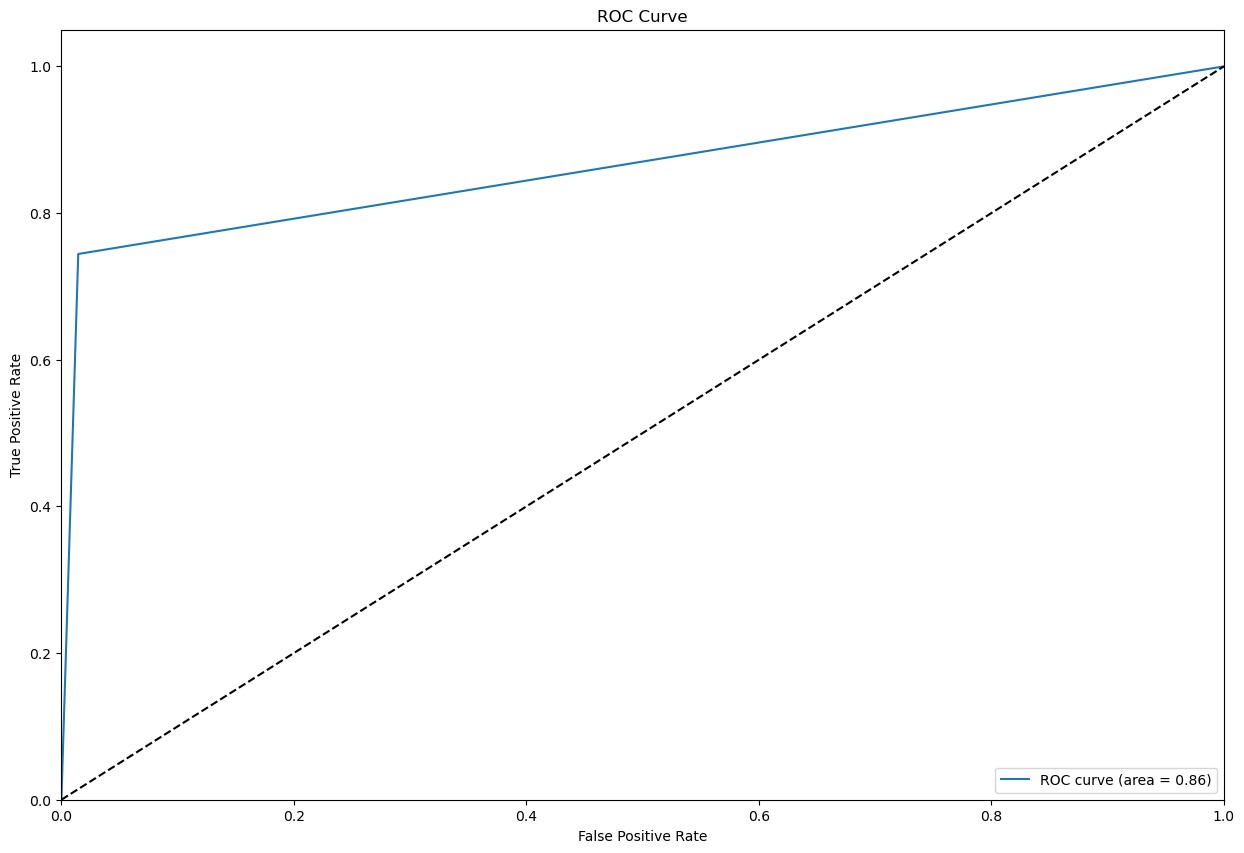

In [57]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, cohen_kappa_score
fpr, tpr, _ = roc_curve(test_y, y_predict)
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print('ROC AUC: %0.2f' % roc_auc)
# Plot of a ROC curve for a specific class
plt.figure(figsize=(15,10))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Performance Comparison

In [58]:
MLA = [LogisticRegression(),GaussianNB()]

In [59]:
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve

In [60]:
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)


row_index = 0
for alg in MLA:
    
    
    predicted = alg.fit(train_x, train_y).predict(test_x)
    fp, tp, th = roc_curve(test_y, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Train Accuracy'] = round(alg.score(train_x, train_y), 4)
    MLA_compare.loc[row_index, 'MLA Test Accuracy'] = round(alg.score(test_x, test_y), 4)
    MLA_compare.loc[row_index, 'MLA Precission'] = precision_score(test_y, predicted)
    MLA_compare.loc[row_index, 'MLA Recall'] = recall_score(test_y, predicted)
    MLA_compare.loc[row_index, 'MLA AUC'] = auc(fp, tp)





    row_index+=1
    
MLA_compare.sort_values(by = ['MLA Test Accuracy'], ascending = False, inplace = True)    
MLA_compare

,MLA Name,MLA Train Accuracy,MLA Test Accuracy,MLA Precission,MLA Recall,MLA AUC
1,GaussianNB,0.9987,0.944,0.914286,0.744186,0.864847
0,LogisticRegression,0.9706,0.920,1.000000,0.534884,0.767442


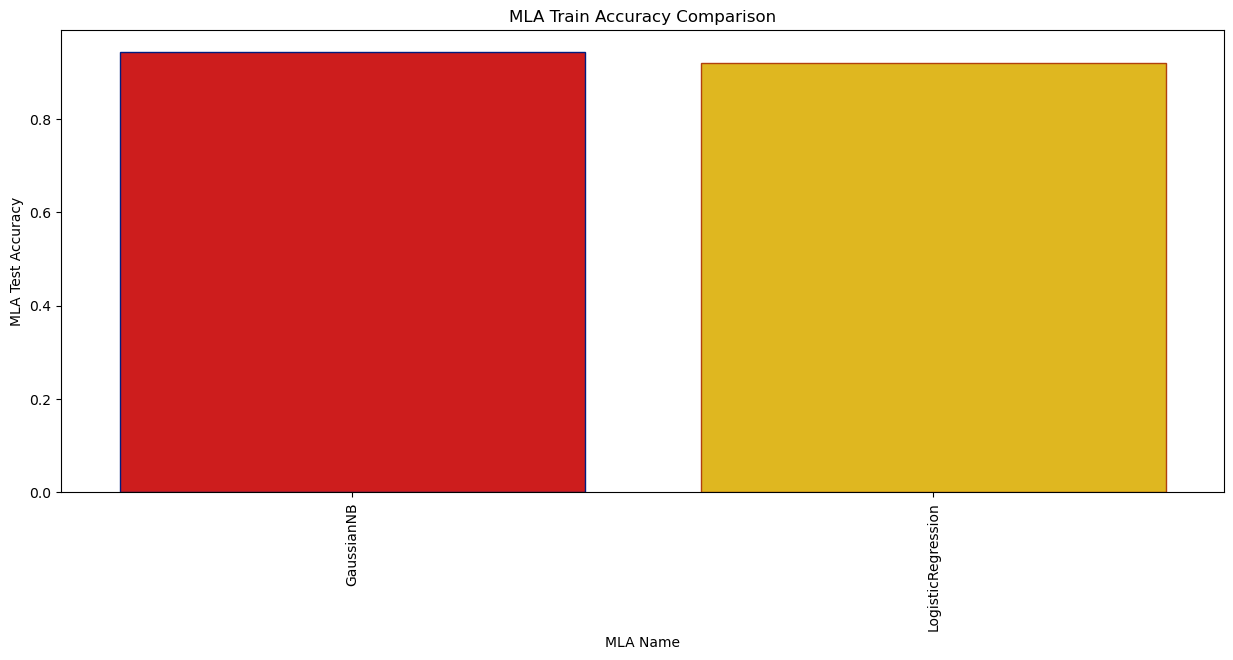

In [61]:
plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA Test Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Train Accuracy Comparison')
plt.show()
